# NEWS MOOD

The assignment consists in perform a sentiment analysis of the Twitter activity of the following news oulets: BBC, CBS, CNN, Fox, and New York Times, and to present the final output a visualized summary of the sentiments expressed in Tweets.


In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import json
import tweepy
import yaml
import seaborn as sns


In [2]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
# Given a yaml filename , return the contents of that file

def get_file_contents(filename):
    try:
        with open(filename, 'r') as config_file:
            config = yaml.load(config_file)
            return (config)
    except FileNotFoundError:
        print("'%s' file not found" % filename)
        

In [4]:
TWITTER_CONFIG_FILE = 'auth.yaml'

config = get_file_contents(TWITTER_CONFIG_FILE)

# Twitter API Keys
consumer_key = config['twitter']['consumer_key']
consumer_secret = config['twitter']['consumer_secret']
access_token = config['twitter']['access_token']
access_token_secret = config['twitter']['access_token_secret']

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Target Search Term
news_outlets = ("BBC", "CBS", "CNN", "FoxNews", "nytimes")


### Extract  tweets for each News Outlet and perform a  Vader sentiment analysis on each tweet.

In [7]:
# Create arrays for holding all the sentiments for each News Outlet

sentiments = []
sentiments_means = []
sentiments_means_df = pd.DataFrame()

positive =0
negative =0
neutral =0

# Loop through all target News Outlets
for outlet in news_outlets:

    counter = 1

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []

    public_tweets = api.search(outlet, count=100, result_type="recent")

    # Loop through all tweets
    for tweet in public_tweets["statuses"]:

        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
            
        # Add each value to the appropriate array
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)
        
        # Add sentiments for each tweet into an array
        sentiments.append({ "Media Source": outlet,
                            "Text" : tweet["text"],
                            "Date": tweet["created_at"], 
                            "Compound": compound,
                            "Positive": pos,
                            "Neutral": neu,
                            "Negative": neg,
                            "Tweets Ago": counter})
        
        if (compound > 0.2) :
            positive += 1
        elif (compound < -0.2):
            negative += 1
        else:
            neutral +=1
                
        # Add to counter 
        counter += 1

    # Store the Average Sentiments
    sentiments_means = { "Media Source": outlet,
                        "Compound": np.mean(compound_list),
                        "Positive": np.mean(positive_list),
                        "Neutral": np.mean(neutral_list),
                        "Negative": np.mean(negative_list),
                        "Tweet Count": len(compound_list)
    }
    
    sentiments_means_df=sentiments_means_df.append(sentiments_means,ignore_index=True)
    

In [8]:
# Convert sentiments and sentiments_means_df dictionaries to DataFrames and Export the Data into CSV files
sentiments_df = pd.DataFrame.from_dict(sentiments)

sentiments_means_df[['Compound','Negative','Neutral', 'Positive']] = sentiments_means_df[['Compound',
                                                                                          'Negative',
                                                                                          'Neutral', 
                                                                                          'Positive']].apply(pd.to_numeric)

sentiments_means_df.to_csv("HW_News_Mood.csv", encoding="utf-8", index=False)

# Sort each plot point by its relative timestamp
sentiments_df.sort_values(by="Date", ascending=True)

,Compound,Date,Media Source,Negative,Neutral,Positive,Text,Tweets Ago
182,-0.3182,Mon Jan 08 23:20:25 +0000 2018,CBS,0.126,0.874,0.000,RT @WiredSources: Pentagon: The Trump Administ...,83
181,0.3612,Mon Jan 08 23:20:25 +0000 2018,CBS,0.000,0.906,0.094,RT @RaniaKhalek: Head of RT to CBS about US in...,82
180,0.0000,Mon Jan 08 23:20:32 +0000 2018,CBS,0.000,1.000,0.000,RT @JackPosobiec: Couldn't you have just used ...,81
179,0.0000,Mon Jan 08 23:20:32 +0000 2018,CBS,0.000,1.000,0.000,"RT @dytpqdlxn: 📣)) 광화문 광장에서 한기총·CBS 규탄대회, \n한기...",80
178,0.0000,Mon Jan 08 23:20:36 +0000 2018,CBS,0.000,1.000,0.000,"RT @dytpqdlxn: 🔥광화문 신천지, 반국가 반사회 반종교는 거짓말하는 한기...",79
176,0.0000,Mon Jan 08 23:20:42 +0000 2018,CBS,0.000,1.000,0.000,"장준환 감독은 7일 CBS노컷뉴스에 ""우리로서는 정말 든든했다""면서 ""문재인 대통령...",77
177,-0.7717,Mon Jan 08 23:20:42 +0000 2018,CBS,0.271,0.729,0.000,We are going to substantialy reduce taxes and ...,78
175,0.7845,Mon Jan 08 23:20:50 +0000 2018,CBS,0.000,0.635,0.365,"Steelers To Offer Super Bowl Tickets, Other Pr...",76
174,0.4019,Mon Jan 08 23:20:59 +0000 2018,CBS,0.000,0.876,0.124,RT @AynRandPaulRyan: Rose\nHalperin\nLauer\nTh...,75
173,0.6369,Mon Jan 08 23:20:59 +0000 2018,CBS,0.000,0.826,0.174,RT @cbssecmtown: CBS senior hurlers take on @h...,74


In [14]:
print ("Positive tweets : {:3d} , Negative tweets: {:3d}, and Neutral tweets: {:3d}".format(positive, negative, neutral))


Positive tweets : 151 , Negative tweets: 112, and Neutral tweets: 220


### Scatter Plot of Sentiments of the last 100 tweets sent out by each News Outlet

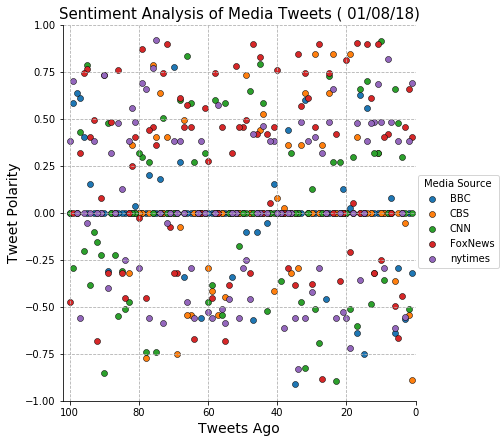

In [15]:
#sns.lmplot(x="Tweets Ago",y="Compound", data=sentiments_df, hue="Media Source", scatter= True, 
#           palette= "Set1", markers= "o", fit_reg=False, size=7, aspect=.8, legend_out= True)

g = sns.FacetGrid(sentiments_df, hue="Media Source", size=6, legend_out= True)
g = (g.map(plt.scatter, "Tweets Ago", "Compound", edgecolor="black", linewidth=.5).add_legend())

#Incorporate the other graph properties
plt.grid(True, ls='dashed')
plt.axis([102, 0, -1, 1])
plt.title("Sentiment Analysis of Media Tweets (%s)" % time.strftime(" %x"), fontsize=15)
plt.xlabel("Tweets Ago", fontsize=14)
plt.ylabel("Tweet Polarity", fontsize=14)
plt.savefig('charts/Sent_Analysis_News_fig1.png')
plt.show()


### CONCLUSIONS: 

The trends were all over the place. There is not identiable trend. The data are, on average, neutral.
The sentiment was more negative two days ago. 

### Bar Plot visualizing the overall sentiments of the last 100 tweets from each news outlet.

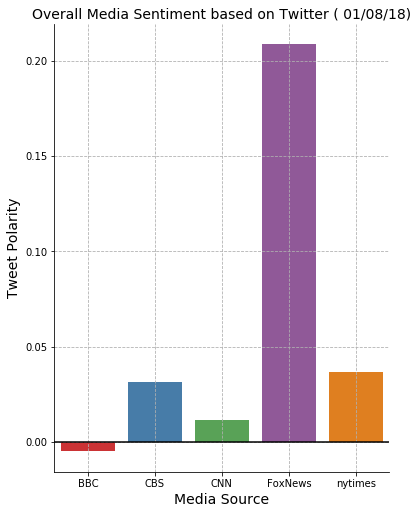

In [16]:

sns.factorplot(x= "Media Source",y="Compound", data=sentiments_means_df, kind="bar", size=7, aspect=.8, palette= "Set1")

#Incorporate the other graph properties

plt.title("Overall Media Sentiment based on Twitter (%s)" % time.strftime(" %x"), fontsize=14)
plt.ylabel("Tweet Polarity", fontsize=14)
plt.xlabel("Media Source", fontsize=14)
plt.grid(True, ls='dashed')
plt.hlines(0, -1, 10, colors='k')
plt.savefig('charts/Overall_Media_Sent_fig2.png')
plt.show()

### CONCLUSIONS: 

In this graph, FoxNews has more positive tweets on January 8th of 2018 afternoon, maybe because many
people tweet about Golden Globe Awards. 

In addition, it would be better to analyze in a longer period of time because this analysis of only 100 tweets per organization or Media Outlet depends on at what time is done.